### Data Reading

  #### Read descriptions:

In [1]:
import string
import re
from nltk import *
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer as SBS
from nltk.stem.lancaster import LancasterStemmer as LS

In [2]:
import pandas as pd
import numpy as np

In [3]:
sw = stopwords.words('english')
def rmv(s, ls):
    return list((filter(lambda s: s not in ls, list(set(s.split())))))

##Lemmatization 
def lem(s):
    wnl = WordNetLemmatizer()
    ls_stem = [wnl.lemmatize(wnl.lemmatize(word),'v') for word in s]
    return ' '.join(ls_stem)

def read_sent(path, i):
    sent = []
    for s in open(path + '/' + str(i) +'.txt'):
        s = s.strip('\n')
        if s != '':
            sent.append(s)
    sents = ' '.join(sent)
    punc = '[' + string.punctuation + ']'
    sents = re.sub(punc, '', sents)
    sents = sents.lower()
    sents = rmv(sents, sw)
    sents = lem(sents).split()
    return [sents]
    
read_sent('descriptions_train',768)

[['raise',
  'sit',
  'two',
  'hold',
  'toast',
  'bear',
  'table',
  'pizza',
  'beer',
  'side',
  'street',
  'hold',
  'glass',
  'guy',
  'pizza',
  'couple',
  'eat',
  'men',
  'food']]

In [4]:
def to_df(path, I):
    m = []
    for i in range(I):
        m.append(read_sent(path, i))
    return pd.DataFrame(m)
des_train = to_df('descriptions_train', 10000)
des_train.head()

0
0  [person, rid, skateboarder, put, picnic, use, ...
1  [soup, serve, chopstick, enjoy, asian, someone...
2  [across, cross, busy, icecream, ice, bus, conc...
3  [grassy, city, green, grass, line, frisbee, yo...
4  [play, raring, little, bat, clothe, tree, back...

In [5]:
des_test = to_df('descriptions_test', 2000)
des_test.head()

0
0  [cell, planter, watch, front, check, blue, bui...
1  [upon, piece, sit, flowery, yellow, angel, con...
2  [picture, group, sit, sign, airplane, fly, ove...
3  [horse, people, rid, sandy, uniform, officer, ...
4  [together, people, adjacent, pay, stand, use, ...

  #### Read Tags:

In [6]:
def read_tag(path, i):
    cate = []
    tag = []
    for t in open(path + '/' + str(i) +'.txt'):
        t = t.strip('\n')
        if t != '':
            t1, t2 = t.split(':')
            cate.append(t1)
            tag.append(t2.split())
    return cate, sum(tag,[])
read_tag('tags_test', 107)

(['furniture',
  'kitchen',
  'kitchen',
  'food',
  'kitchen',
  'electronic',
  'person'],
 ['dining',
  'table',
  'fork',
  'knife',
  'pizza',
  'wine',
  'glass',
  'cell',
  'phone',
  'person'])

In [7]:
cate_all = []
tag_all = []
tag_ls_train = []

for i in range(10000):
    cate, tag = read_tag('tags_train', i)
    cate_all.append(cate)
    tag_all.append(tag)
    tag_ls_train.append([cate, tag])

In [8]:
tag_train = pd.DataFrame(tag_ls_train, columns= ['category', 'tags'])

In [9]:
tag_train.head(5)

category  \
0  [vehicle, outdoor, sports, person, vehicle, ac...   
1                           [kitchen, food, kitchen]   
2                [vehicle, vehicle, outdoor, person]   
3                 [person, outdoor, sports, vehicle]   
4                                   [person, sports]   

                                                tags  
0  [airplane, bench, skateboard, person, truck, b...  
1                              [bowl, carrot, spoon]  
2               [car, truck, traffic, light, person]  
3                      [person, bench, frisbee, car]  
4                            [person, baseball, bat]

In [10]:
tag_ls_test = []

for i in range(2000):
    cate, tag = read_tag('tags_test', i)
    tag_ls_test.append([cate, tag])
tag_test = pd.DataFrame(tag_ls_test, columns= ['category', 'tags'])

In [11]:
tag_test.head(5)

category  \
0  [furniture, accessory, accessory, accessory]   
1                                      [animal]   
2                              [sports, person]   
3                   [vehicle, outdoor, vehicle]   
4                           [animal, furniture]   

                             tags  
0  [bed, backpack, suitcase, tie]  
1                           [cow]  
2               [frisbee, person]  
3    [car, traffic, light, truck]  
4                      [cat, bed]

  #### Read features:

In [12]:
feature_train = pd.read_csv('features_train/features_resnet1000_train.csv', header = None)
feature_train_itm = pd.read_csv('features_train/features_resnet1000intermediate_train.csv', header = None)

In [13]:
def mystrip1(s):
    s = s[13:]
    s = s[:-4]
    return int(s)

In [14]:
feature_train[0] = list(map(mystrip1, feature_train[0]))
feature_train_itm[0] = list(map(mystrip1, feature_train_itm[0]))

In [15]:
feature_train.head(5)

0         1         2         3         4         5         6         7     \
0  5373 -0.899450 -0.930470 -2.503365 -3.172499 -2.819133  0.992159 -3.698863   
1   984 -1.346954 -3.119461 -0.765971 -1.382550 -1.104675 -3.656271 -4.815436   
2  7127 -3.445498 -1.524573 -1.001654 -3.668335 -1.805517 -1.633496 -7.127826   
3  9609  1.114650 -2.167102  0.097881 -1.336255  0.853483 -0.374885 -2.369090   
4  5293  1.602650 -1.505817  3.029409  4.092412  1.711755  6.271253  4.173686   

       8         9       ...         991       992       993       994   \
0  0.619991  0.956148    ...    -3.021916  2.214253 -1.382491  1.672911   
1 -0.556942 -1.402286    ...     0.011003 -3.968805 -2.694711 -4.196480   
2 -1.147802 -1.055816    ...    -2.991777 -2.628053 -2.971074 -2.537039   
3 -2.273191 -1.143788    ...    -1.248134 -0.633126 -1.723514 -2.638832   
4 -2.177313  0.747789    ...    -1.285806 -2.266481 -3.898053  2.295787   

       995       996       997       998       999       1000  
0  1.014233  2.599949  2.773284 -2.066632  0.385754 -3.241320  
1 -2.880234 -1.210742 -1.605143 -4.859987 -0.837670 -0.967604  
2 -1.707429  1.013672  0.608460 -3.714998 -0.484735  0.138767  
3  0.097149  4.647974  1.030138 -2.193836  1.044024  0.176043  
4 -1.749552  0.974188  1.258117 -1.975622 -1.278643 -1.941441  

[5 rows x 1001 columns]

#### Sentences & Tag similarity:

In [16]:
from word_sim import word_similarity

In [17]:
a1 = des_train.iloc[50]
a1

0    [blue, purple, dark, hair, necktie, spot, pers...
Name: 50, dtype: object

In [18]:
b1 = tag_train.iloc[50]
b1

category    [accessory, person]
tags              [tie, person]
Name: 50, dtype: object

In [64]:
%timeit word_similarity('fruit', 'apple')

100 loops, best of 3: 2.05 ms per loop


In [19]:
def words_sim(sents, tags):
    sim_sum = 0
    for t in tags:
        tag_max = 0
        for s in sents:
            z = word_similarity(t, s)
            if z >= tag_max:
                tag_max = z
        sim_sum += (tag_max)**2
    discount = len(tags)
    if discount == 0:
        return 0
    else:
        return sim_sum/discount

In [34]:
def compare_train(des, tag):
    a1 = des_train.iloc[des]
    b1 = tag_train.iloc[tag]
    return words_sim(a1[0], b1[0])*0.4 + words_sim(a1[0], b1[1])*0.6

In [21]:
def compare_test(des, tag):
    a1 = des_test.iloc[des]
    b1 = tag_test.iloc[tag]
    return words_sim(a1[0], b1[0])*0.4 + words_sim(a1[0], b1[1])*0.6

In [48]:
def find_pic(s):
    rank = []
    for i in range(2000):
        a = compare_test(s, i)
        rank.append(a)
    st = np.argsort(rank)[-20:]
    return tag_test.iloc[st], np.array(rank)[st]

In [55]:
import time
t1 = time.time()
a,b = find_pic(800)
print(time.time() - t1)

554.0014541149139


In [56]:
des_test.iloc[800]

0    [homemade, pan, two, rack, oven, cook, pizza, ...
Name: 800, dtype: object

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
def show_img(df, img):
    path = 'images_' + df + '/' + str(img) + '.jpg'
    img=mpimg.imread(path)
    imgplot=plt.imshow(img)
    plt.show()
    return

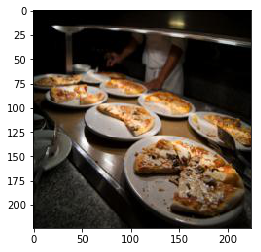

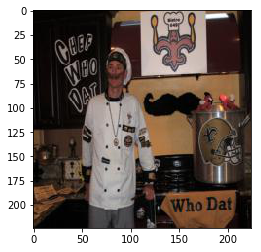

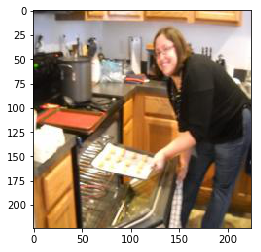

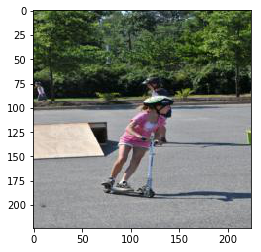

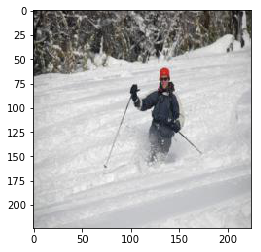

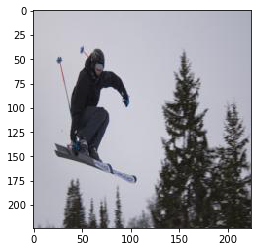

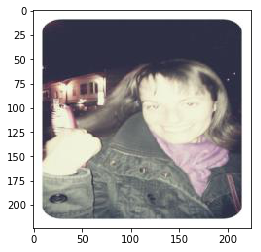

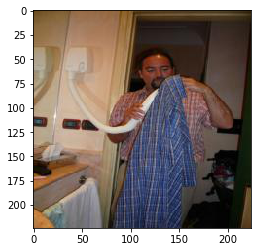

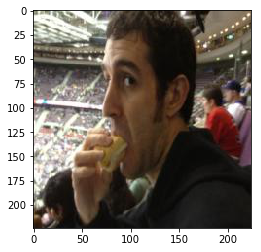

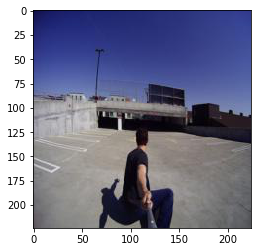

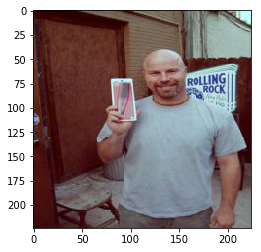

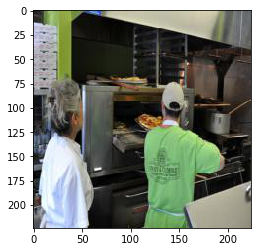

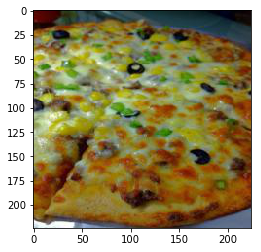

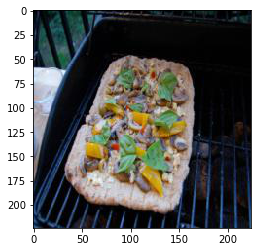

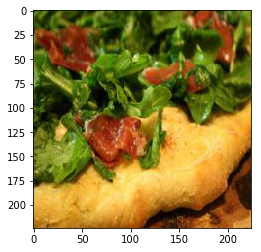

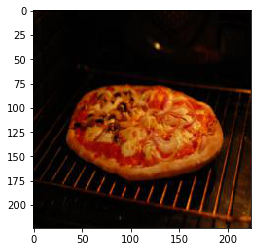

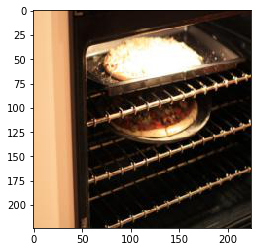

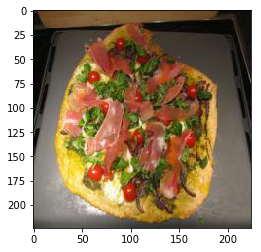

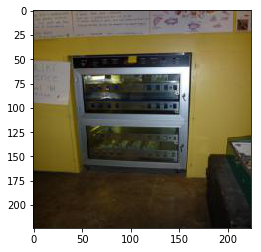

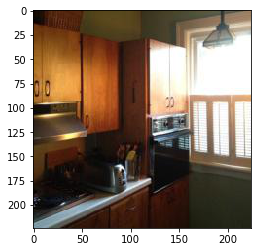

In [59]:
for i in a.index:
    show_img('test', i)

In [29]:
%timeit compare_train(1,1)

1 loop, best of 3: 243 ms per loop


In [122]:
dic_test_des = np.array(list(set(sum(des_test[0], []))))
dic_test_tag = np.array(list(set(sum(tag_test.tags, []))))
dic_test_cate = np.array(list(set(sum(tag_test.category, []))))


In [102]:
with open('matrix.csv','w') as f:
    title = ', '.join(dic_test_cate)
    f.write('matrix, ' + title + '\n')
    for i in dic_test_des:
        res = [str(word_similarity(i,j)) for j in dic_test_cate]
        write = i + ', '  + ','.join(res)
        f.write(write+'\n')    
    f.close()

In [235]:
with open('matrix_cate.csv','w') as f:
    title = ', '.join(dic_test_tag)
    f.write('matrix, ' + title + '\n')
    for i in dic_test_des:
        res = [str(word_similarity(i,j)) for j in dic_test_tag]
        write = i + ', '  + ','.join(res)
        f.write(write+'\n')    
    f.close()

In [243]:
cate_des_test_sim = pd.read_csv('matrix.csv', index_col='matrix')
cate_des_test_sim.head()

outdoor    animal   electronic   furniture    sports   indoor  \
matrix                                                                   
mit          nan  0.201595          NaN    0.246229  0.201595      NaN   
like         0.0  0.000000          0.0    0.000000  0.000000      0.0   
roadway      nan  0.245693          NaN    0.300090  0.245693      NaN   
beard        0.0  0.543876          0.0    0.201156  0.655591      0.0   
teen         nan  0.448659          NaN    0.165052  0.547993      NaN   

           person   vehicle   accessory      food   kitchen   appliance  
matrix                                                                   
mit      0.201595  0.246229    0.246229  0.135133  0.300745    0.246229  
like     0.000000  0.000000    0.000000  0.301011  0.000000    0.000000  
roadway  0.245693  0.300090    0.300745  0.164693  0.246229    0.300090  
beard    0.811368  0.359796    0.301011  0.285172  0.165052    0.201156  
teen     0.669320  0.300745    0.246447  0.246229  0.135133    0.165052

In [237]:
tag_des_test_sim = pd.read_csv('matrix_cate.csv', index_col='matrix')
tag_des_test_sim.head()

cell      fork   airplane      sign   microwave  \
matrix                                                                     
mit        0.3007448127788596  0.201595   0.110792  0.448659    0.110792   
like                      0.0  0.000000   0.000000  0.000000    0.000000   
roadway   0.30009007071166743  0.246229   0.135322  0.366531    0.135322   
beard       0.439455461015182  0.200081   0.090709  0.298486    0.000000   
teen       0.3673305438304631  0.165052   0.074266  0.201595    0.090663   

             ball     horse     knife    orange   umbrella   ...     \
matrix                                                       ...      
mit      0.300745  0.300745  0.165199  0.090583   0.165199   ...      
like     0.000000  0.000000  0.000000  0.000000   0.000000   ...      
roadway  0.366531  0.246229  0.201774  0.110397   0.201774   ...      
beard    0.300745  0.165052  0.135253  0.367331   0.000000   ...      
teen     0.246447  0.135133  0.110736  0.165052   0.110736   ...      

          baseball     donut      kite   keyboard      bird     mouse  \
matrix                                                                  
mit       0.165199  0.060719  0.300745   0.246229  0.165199  0.201595   
like      0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
roadway   0.201774  0.074163  0.366531   0.300090  0.201774  0.246229   
beard     0.135253  0.135133  0.244379   0.201156  0.367789  0.655591   
teen      0.110736  0.110638  0.201595   0.165052  0.301120  0.547993   

            apple    racket      stop   potted  
matrix                                          
mit      0.090696  0.201595  0.367331      NaN  
like     0.000000  0.000000  0.000000      0.0  
roadway  0.110776  0.246229  0.300090      NaN  
beard    0.165258  0.000000  0.000000      0.0  
teen     0.135302  0.135133  0.165052      NaN  

[5 rows x 92 columns]

In [257]:
look_up_cate_test = {}
for i, j in enumerate(dic_test_cate):
    look_up_cate_test[j] = i

In [258]:
look_up_des_test = {}
for i, j in enumerate(dic_test_des):
    look_up_des_test[j] = i

In [259]:
look_up_tag_test = {}
for i, j in enumerate(dic_test_tag):
    look_up_tag_test[j] = i

In [260]:
test_cate_m = cate_des_test_sim.values
test_tag_m = tag_des_test_sim.values

In [292]:
def sim_cate_test(sents, tags):
    sim_sum = 0
    for t in tags:
        tag_max = 0
        t_id = look_up_cate_test[t]
        for s in sents:
            s_id = look_up_des_test[s]
            z = test_cate_m[s_id][t_id]
            if type(z) != str:
                if z >= tag_max:
                    tag_max = z
        sim_sum += (tag_max)**2
    discount = len(tags)
    if discount == 0:
        return 0
    else:
        return sim_sum/discount

In [293]:
def compare_test_cate(des, cate):
    a1 = des_test.iloc[des]
    b1 = tag_test.iloc[cate]
    return sim_cate_test(a1[0], b1[0])

In [294]:
def sim_tag_test(sents, tags):
    sim_sum = 0
    for t in tags:
        tag_max = 0
        t_id = look_up_tag_test[t]
        for s in sents:
            s_id = look_up_des_test[s]
            z = test_tag_m[s_id][t_id]
            if type(z) != str:
                if z >= tag_max:
                    tag_max = z
        sim_sum += (tag_max)**2
    discount = len(tags)
    if discount == 0:
        return 0
    else:
        return sim_sum/discount

In [352]:
def compare_test_tag(des, tag):
    
    a1 = des_test.iloc[des]
    b1 = tag_test.iloc[tag]
    return sim_tag_test(a1[0], b1[1])

In [353]:
def find_pic1(s):
    rank = []
    for i in range(2000):
        t1 = time.time()
        cate_score = compare_test_cate(s, i)
        tag_score = compare_test_tag(s, i)
        total_score = cate_score*0.2 + tag_score*0.8
        rank.append(total_score)
    st = np.argsort(rank)[-20:]
    return tag_test.iloc[st], np.array(rank)[st]

In [357]:
import time
t1 = time.time()
a,b = find_pic1(15)
print(time.time() - t1)

1.423393964767456


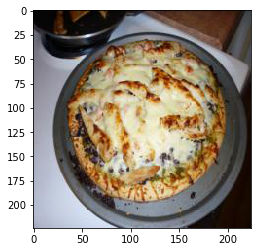

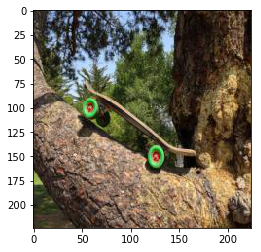

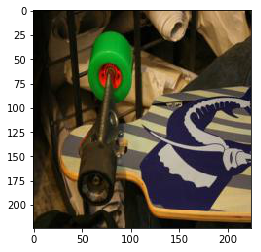

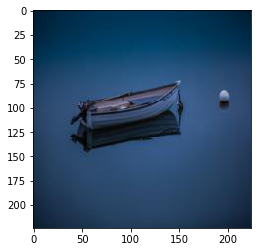

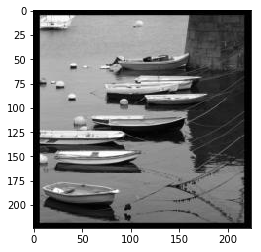

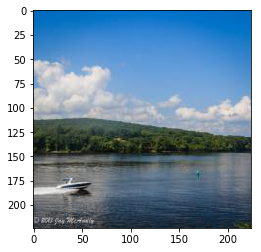

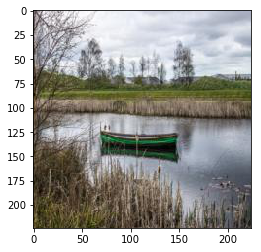

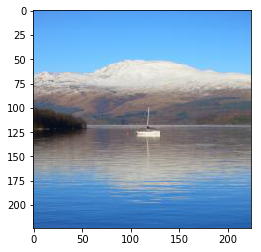

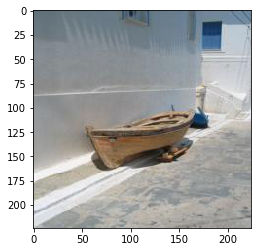

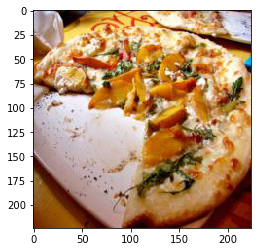

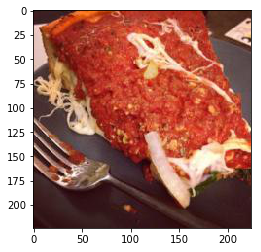

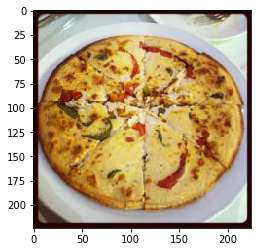

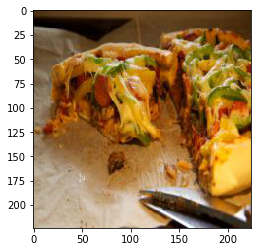

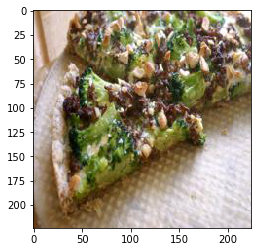

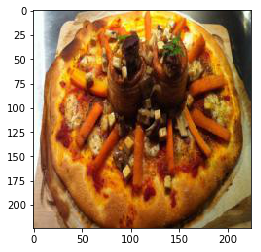

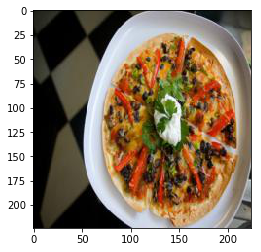

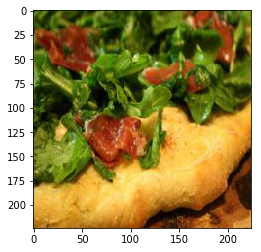

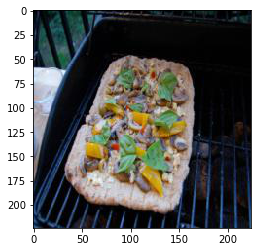

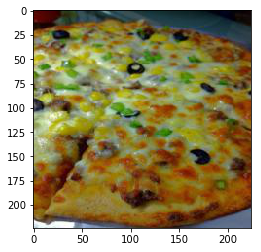

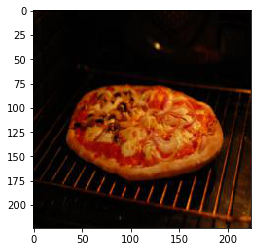

In [359]:
for i in a.index:
    show_img('test', i)

In [ ]:
look_up_tag_test

In [300]:
t1 = time.time()
for i in range(2000):
    compare_test_tag(i,20)
print(time.time() - t1)

0.7277970314025879


In [234]:
pd.read_csv('matrix_cate.csv', index_col='matrix').head()

cell      fork   airplane      sign   microwave  \
matrix                                                                     
mit        0.3007448127788596  0.201595   0.110792  0.448659    0.110792   
like                      0.0  0.000000   0.000000  0.000000    0.000000   
roadway   0.30009007071166743  0.246229   0.135322  0.366531    0.135322   
beard       0.439455461015182  0.200081   0.090709  0.298486    0.000000   
teen       0.3673305438304631  0.165052   0.074266  0.201595    0.090663   

             ball     horse     knife    orange   umbrella   ...     \
matrix                                                       ...      
mit      0.300745  0.300745  0.165199  0.090583   0.165199   ...      
like     0.000000  0.000000  0.000000  0.000000   0.000000   ...      
roadway  0.366531  0.246229  0.201774  0.110397   0.201774   ...      
beard    0.300745  0.165052  0.135253  0.367331   0.000000   ...      
teen     0.246447  0.135133  0.110736  0.165052   0.110736   ...      

          baseball     donut      kite   keyboard      bird     mouse  \
matrix                                                                  
mit       0.165199  0.060719  0.300745   0.246229  0.165199  0.201595   
like      0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
roadway   0.201774  0.074163  0.366531   0.300090  0.201774  0.246229   
beard     0.135253  0.135133  0.244379   0.201156  0.367789  0.655591   
teen      0.110736  0.110638  0.201595   0.165052  0.301120  0.547993   

            apple    racket      stop   potted  
matrix                                          
mit      0.090696  0.201595  0.367331      NaN  
like     0.000000  0.000000  0.000000      0.0  
roadway  0.110776  0.246229  0.300090      NaN  
beard    0.165258  0.000000  0.000000      0.0  
teen     0.135302  0.135133  0.165052      NaN  

[5 rows x 92 columns]

In [241]:
word_similarity('electronics', 'apple')

0.03336503379933401